In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf 

%matplotlib inline

In [2]:
import utils as ut
early_stopping = ut.EarlyStopping(patience=300, verbose=1)

seed_int = 123
rng = np.random.RandomState(seed_int)

# 1. Create Data for Adding Problem

0.630179569852


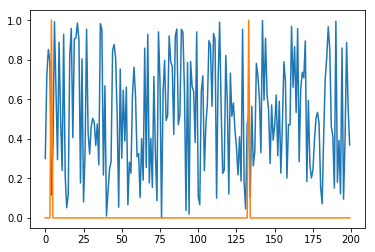

In [9]:
def mask(T=200):
    mask = np.zeros(T)
    indices = rng.permutation(np.arange(T))[:2] # create a permutation and select the first 2 indices
    mask[indices] = 1 # set them to 1
    return mask

def toy_problem(N=10, T=200):
    signals = rng.uniform(low=0.0, high=1.0, size=(N, T))
    masks = np.zeros((N, T))
    for i in range(N):
        masks[i] = mask(T)
    data = np.zeros((N, T, 2))
    data[:, :, 0] = signals[:]
    data[:, :, 1] = masks[:]
    target = (signals*masks).sum(axis=1).reshape(N, 1)
    return (data, target)

def mAdd(Xt):
    return np.sum(Xt[:, 0]*Xt[:, 1])

N=1000
T=200
maxlen = T
X, Y = toy_problem(N=N, T=T)
N_train = int(N*0.9)
N_validation = N-N_train
X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X, Y, test_size=N_validation, random_state=seed_int)

print(mAdd(X[0, :, :]))
plt.plot(X[0, :, :])

# 2a. Prepare Model Functions for Graph

In [15]:
def weight_variable(shape, name=None):
    initial = tf.truncated_normal(shape, stddev=0.01) # resample 2 sd vals
    return tf.get_variable(name, dtype=tf.float32, initializer=initial)
    
def bias_variable(shape, name=None, init_fun=tf.zeros):
    initial = init_fun(shape, dtype=tf.float32)
    return tf.get_variable(name, dtype=tf.float32, initializer=initial)

# 2b. Manual Inference Functions

In [ ]:
def infere_RNN(x, n_batch, maxlen=None, n_hidden=None, n_out=None, n_in=None):
    #########################################################################
    # Write an RNN that takes as input data a matrix x
    # with shape=[n_batch, maxlen, n_in])
    #########################################################################
    return y

def infere_LSTM(x, n_batch, maxlen=None, n_hidden=None, n_out=None, 
                n_in=None):
    #########################################################################
    # Write an LSTM that takes as input data a matrix x
    # with shape=[n_batch, maxlen, n_in])
    #########################################################################
    return y, [V, c]

def infere_GRU(x, n_batch, maxlen=None, n_hidden=None, n_out=None, 
                n_in=None):
    #########################################################################
    # Write a GRU that takes as input data a matrix x
    # with shape=[n_batch, maxlen, n_in])
    #########################################################################
    return y

# 2c. Loss and other functions for training

In [11]:
def loss_fun(y, t):
    mse = tf.reduce_mean(tf.square(y - t))
    return mse

def training(loss):
    optimize = tf.train.AdamOptimizer(learning_rate = 0.001, beta1=0.9, beta2=0.999)
    train_step = optimize.minimize(loss)
    return train_step


# 3. Define Graph

In [20]:
tf.reset_default_graph()

maxlen = 200
n_hidden = 4
n_out = 1
n_in = 2

x = tf.placeholder(tf.float32, shape=[None, maxlen, n_in])
t = tf.placeholder(tf.float32, shape=[None, n_out])
n_batch = tf.placeholder(tf.int32, [])

y = infere_lstm(x, n_batch, maxlen=maxlen, n_hidden=n_hidden, n_out= n_out, n_in=n_in)

loss = loss_fun(y, t)
train_step = training(loss)


# 4. Run Computational Graph

In [ ]:
import time
start_time = time.time()

epochs = 1000
batch_size = 10

tf.set_random_seed(seed_int)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
history= {'val_loss': []}
n_batches = N_train // batch_size
early_stopping = ut.EarlyStopping(patience=100, verbose=1)
for epoch in range(epochs):
    X_, Y_ = shuffle(X_train, Y_train, random_state = seed_int)
    for i in range(n_batches):
        start = i*batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end],
            n_batch: batch_size
        })
    val_loss = loss.eval(session=sess, feed_dict={
        x: X_validation,
        t: Y_validation,
        n_batch: N_validation
    })
    history['val_loss'].append(val_loss)
    print('epoch:', epoch, ' validation loss: ', val_loss)
    #Early Stopping
    if early_stopping.validate(val_loss):
        break
        
        
duration = time.time() - start_time
print(duration)

epoch: 0  validation loss:  0.677761
epoch: 1  validation loss:  0.273296
epoch: 2  validation loss:  0.184013
epoch: 3  validation loss:  0.178999
epoch: 4  validation loss:  0.179236
